In [2]:
import pandas as pd

In [3]:
# (1) Используя параметры read_csv из pandas прочитать файл csv так,
# чтобы данные были разбиты по соответствующим колонкам 
# (а не все слилось в одну)
df = pd.read_csv('C:/Users/Alexander/Desktop/UCI_Credit_Card.csv')

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [167]:
# (2) выведите, что за типы переменных, сколько пропусков,
# для численных значений посчитайте пару статистик (в свободной форме)
df.info(memory_usage=True)
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [175]:
df[['LIMIT_BAL','AGE']].describe()

,LIMIT_BAL,AGE
count,30000.000000,30000.000000
mean,167484.322667,35.485500
std,129747.661567,9.217904
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,1000000.000000,79.000000


In [172]:
df.groupby('SEX').mean().AGE

SEX
1    36.519431
2    34.806868
Name: AGE, dtype: float64

In [169]:
df.groupby('EDUCATION').count().ID

EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: ID, dtype: int64

In [55]:
# (3) посчитать число женщин с университетским образованием
# SEX (1 = male; 2 = female). 
# EDUCATION (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
df[(df.SEX==2)&(df.EDUCATION==2)].count().ID
#TODO

8656

In [129]:
# (4) Сгрупировать по "default payment next month" и посчитать медиану для всех показателей начинающихся на BILL_ и PAY_
#TODO
df_median=df[df.columns[(df.columns.str.contains('PAY_'))|(df.columns.str.contains('BILL_'))|(df.columns.str.contains('default.payment.next.month'))]]

df_median.groupby('default.payment.next.month').median()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default.payment.next.month,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,23119.5,21660.5,20202.5,19000.0,17998.0,16679.0,2459.5,2247.5,2000.0,1734.0,1765.0,1706.0
1,1,0,0,0,0,0,20185.0,20300.5,19834.5,19119.5,18478.5,18028.5,1636.0,1533.5,1222.0,1000.0,1000.0,1000.0


In [63]:
# (5) постройте сводную таблицу (pivot table) по SEX, EDUCATION, MARRIAGE

df.pivot_table #TODO

<bound method pivot_table of           ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1    20000.0    2          2         1   24      2      2     -1   
1          2   120000.0    2          2         2   26     -1      2      0   
2          3    90000.0    2          2         2   34      0      0      0   
3          4    50000.0    2          2         1   37      0      0      0   
4          5    50000.0    1          2         1   57     -1      0     -1   
5          6    50000.0    1          1         2   37      0      0      0   
6          7   500000.0    1          1         2   29      0      0      0   
7          8   100000.0    2          2         2   23      0     -1     -1   
8          9   140000.0    2          3         1   28      0      0      2   
9         10    20000.0    1          3         2   35     -2     -2     -2   
10        11   200000.0    2          3         2   34      0      0      2   
11        12   260000.0

In [182]:
#df.pivot_table(df,index=['ID','LIMIT_BAL','SEX', 'EDUCATION', 'MARRIAGE']) таблица из ответа в примере 
df.pivot_table(df,index=['SEX', 'EDUCATION', 'MARRIAGE']) #сводная только по 'SEX', 'EDUCATION', 'MARRIAGE'

In [ ]:
# (6) Создать новый строковый столбец в data frame-е, который:
# принимает значение A, если значение LIMIT_BAL <=10000
# принимает значение B, если значение LIMIT_BAL <=100000 и >10000
# принимает значение C, если значение LIMIT_BAL <=200000 и >100000
# принимает значение D, если значение LIMIT_BAL <=400000 и >200000
# принимает значение E, если значение LIMIT_BAL <=700000 и >400000
# принимает значение F, если значение LIMIT_BAL >700000

#TODO

In [21]:
def conditions(s):
    if (s['LIMIT_BAL'] <=10000) :
        return 'A'
    elif (s['LIMIT_BAL'] >10000) and (s['LIMIT_BAL'] <=100000):
        return 'B'
    elif (s['LIMIT_BAL'] >100000) and (s['LIMIT_BAL'] <=200000):
        return 'C'
    elif (s['LIMIT_BAL'] >200000) and (s['LIMIT_BAL'] <=400000):
        return 'D'
    elif (s['LIMIT_BAL'] >400000) and (s['LIMIT_BAL'] <=700000):
        return 'E'
    elif (s['LIMIT_BAL'] >700000) :
        return 'F'

In [23]:
df['Class'] = df.apply(conditions, axis=1)

In [25]:
df.head() # проверка нового столбца

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,Class
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,B
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,C
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,B
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,B
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,B


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

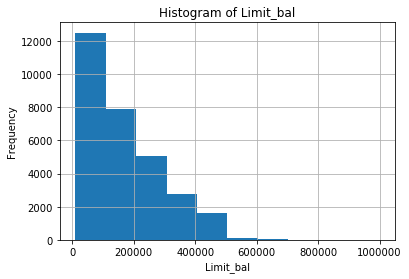

In [138]:
# (7) постироить распределение LIMIT_BAL (гистрограмму)
df['LIMIT_BAL'].hist()
plt.title('Histogram of Limit_bal')
plt.xlabel('Limit_bal')
plt.ylabel('Frequency')

In [166]:
df[df.SEX==2].groupby('EDUCATION').mean().LIMIT_BAL
df[df.SEX==1].groupby('EDUCATION').mean().LIMIT_BAL

EDUCATION
0    223333.333333
1    208557.213930
2    155232.902033
3    130362.145542
4    233209.876543
5    172756.756757
6    139615.384615
Name: LIMIT_BAL, dtype: float64

In [ ]:
# (8) построить среднее значение кредитного лимита для каждого вида образования 
# и для каждого пола
# график необходимо сделать очень широким (на весь экран)

sns.factorplot('EDUCATION','LIMIT_BAL', data=df,hue='SEX',size=8, aspect=2)
plt.show()

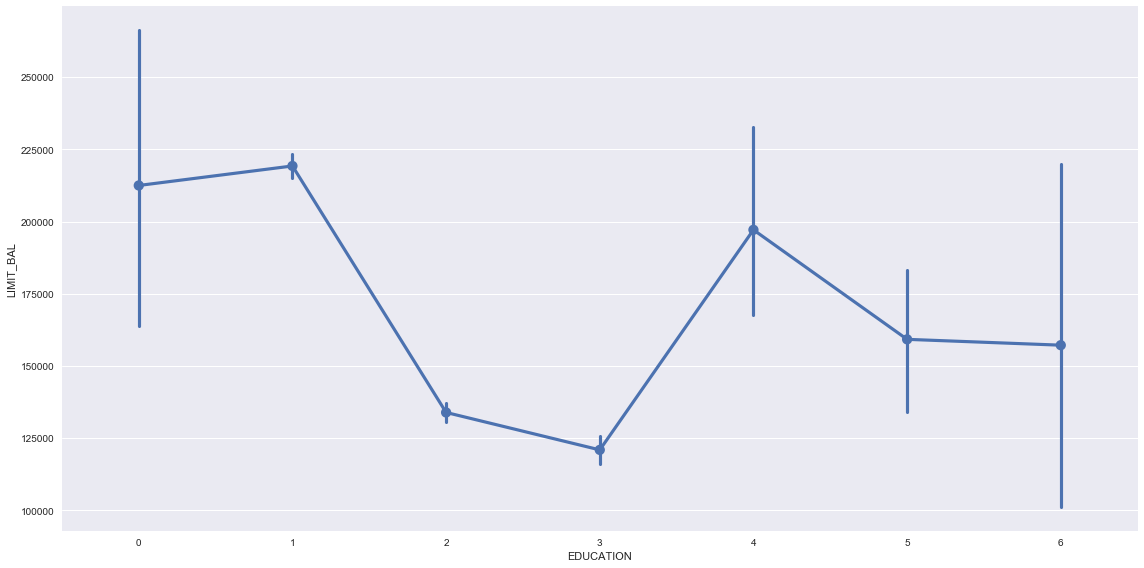

In [9]:
# (9) построить зависимость кредитного лимита и образования только для одного из полов
sns.factorplot('EDUCATION','LIMIT_BAL', data=df[df.SEX==1],size=8, aspect=2 )
#TODO

In [ ]:
# (10) построить большой график (подсказка - используя seaborn) для построения завимисости всех возможных пар параметров
# разным цветом выделить разные значение "default payment next month"
# (но так как столбцов много - картинка может получиться "монструозной")
# (поэкспериментируйте над тем как построить подобное сравнение параметров)
# (подсказка - ответ может состоять из несколькольких графиков)
# (если не выйдет - программа минимум - построить один график со всеми параметрами)
import seaborn as sns 

#TODO

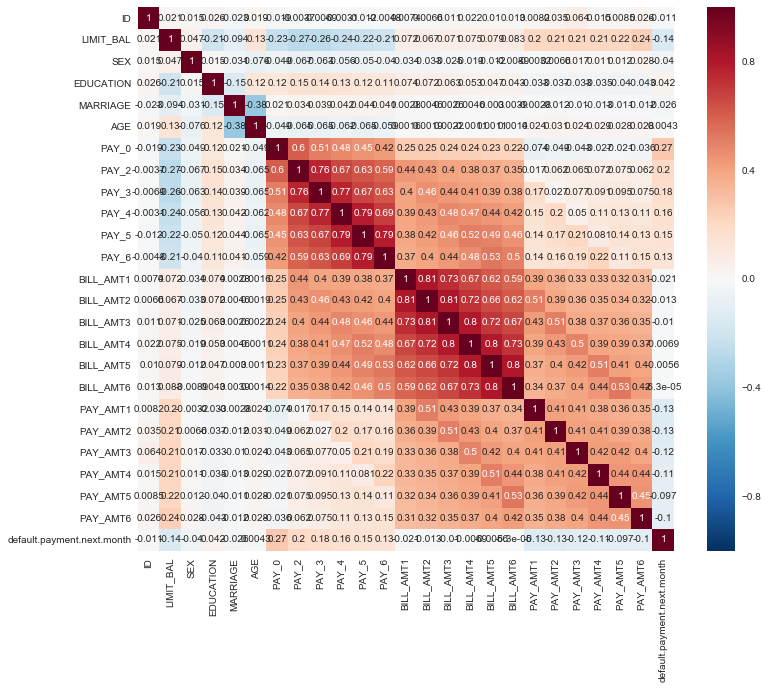

In [7]:
# рассмотрим график парных корреляций , на нем явно видны два кластера с высокой корреляцией , рассмотрим их
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr('kendall'), annot=True);

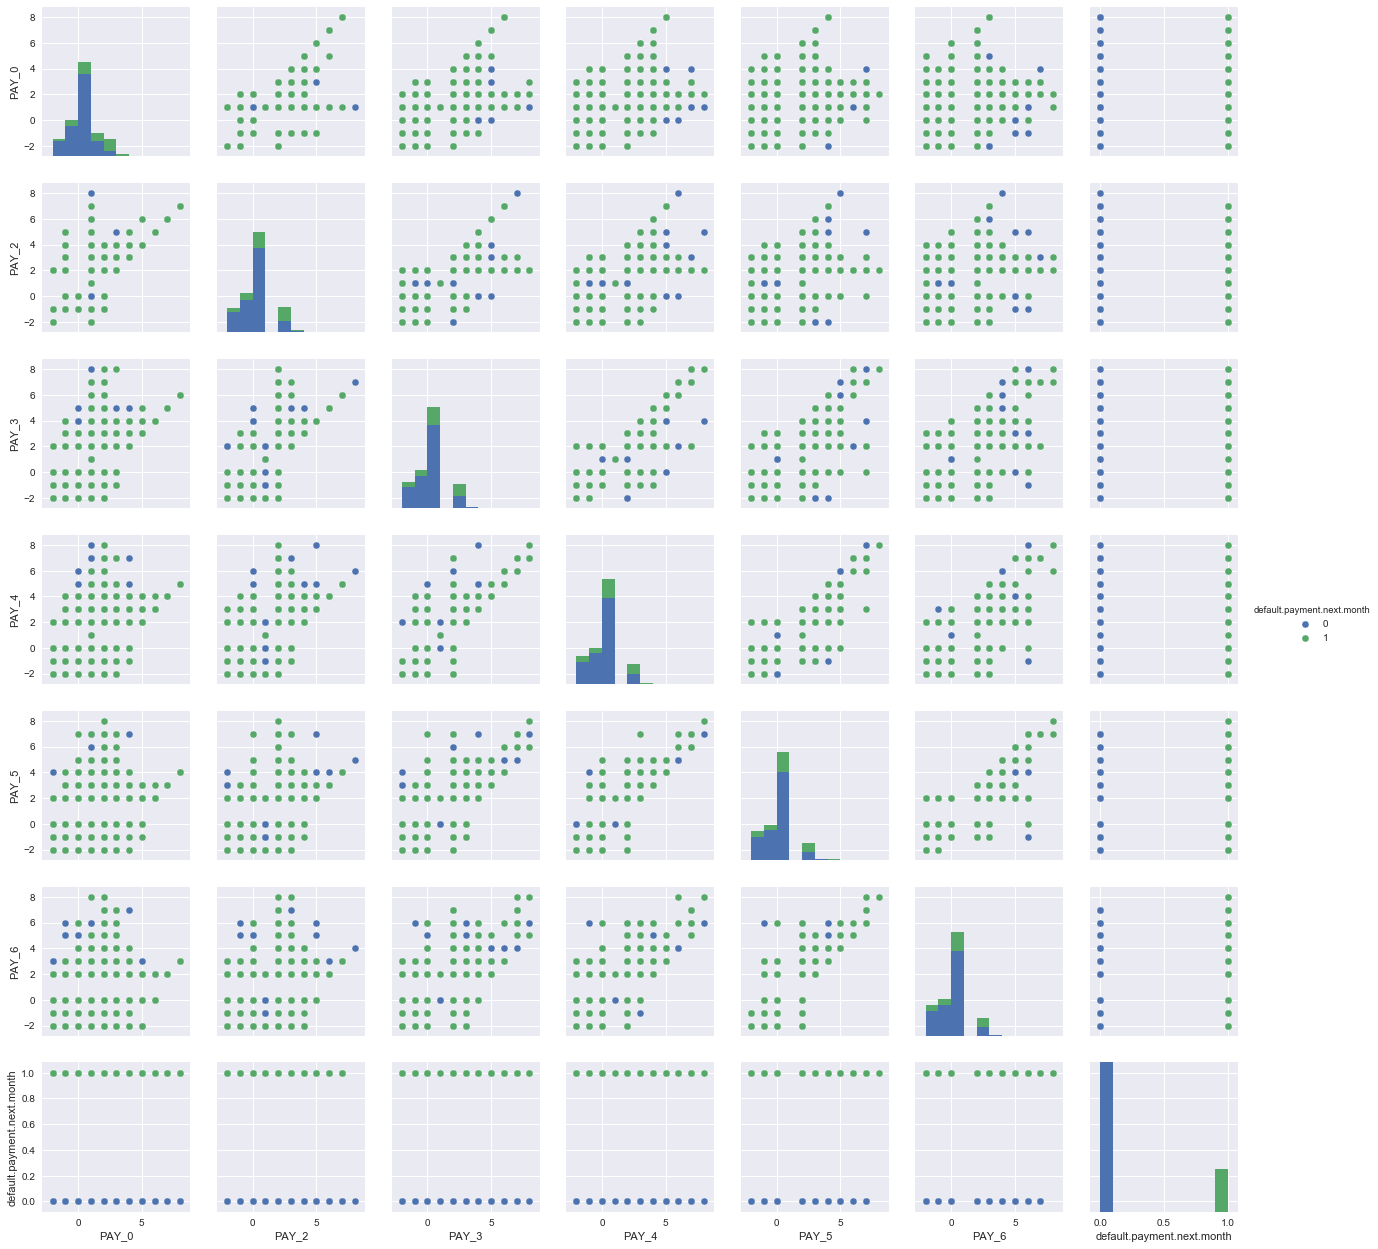

In [8]:
#Рассмотрим 1ый кластер
sns.pairplot(df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','default.payment.next.month']],hue='default.payment.next.month') 

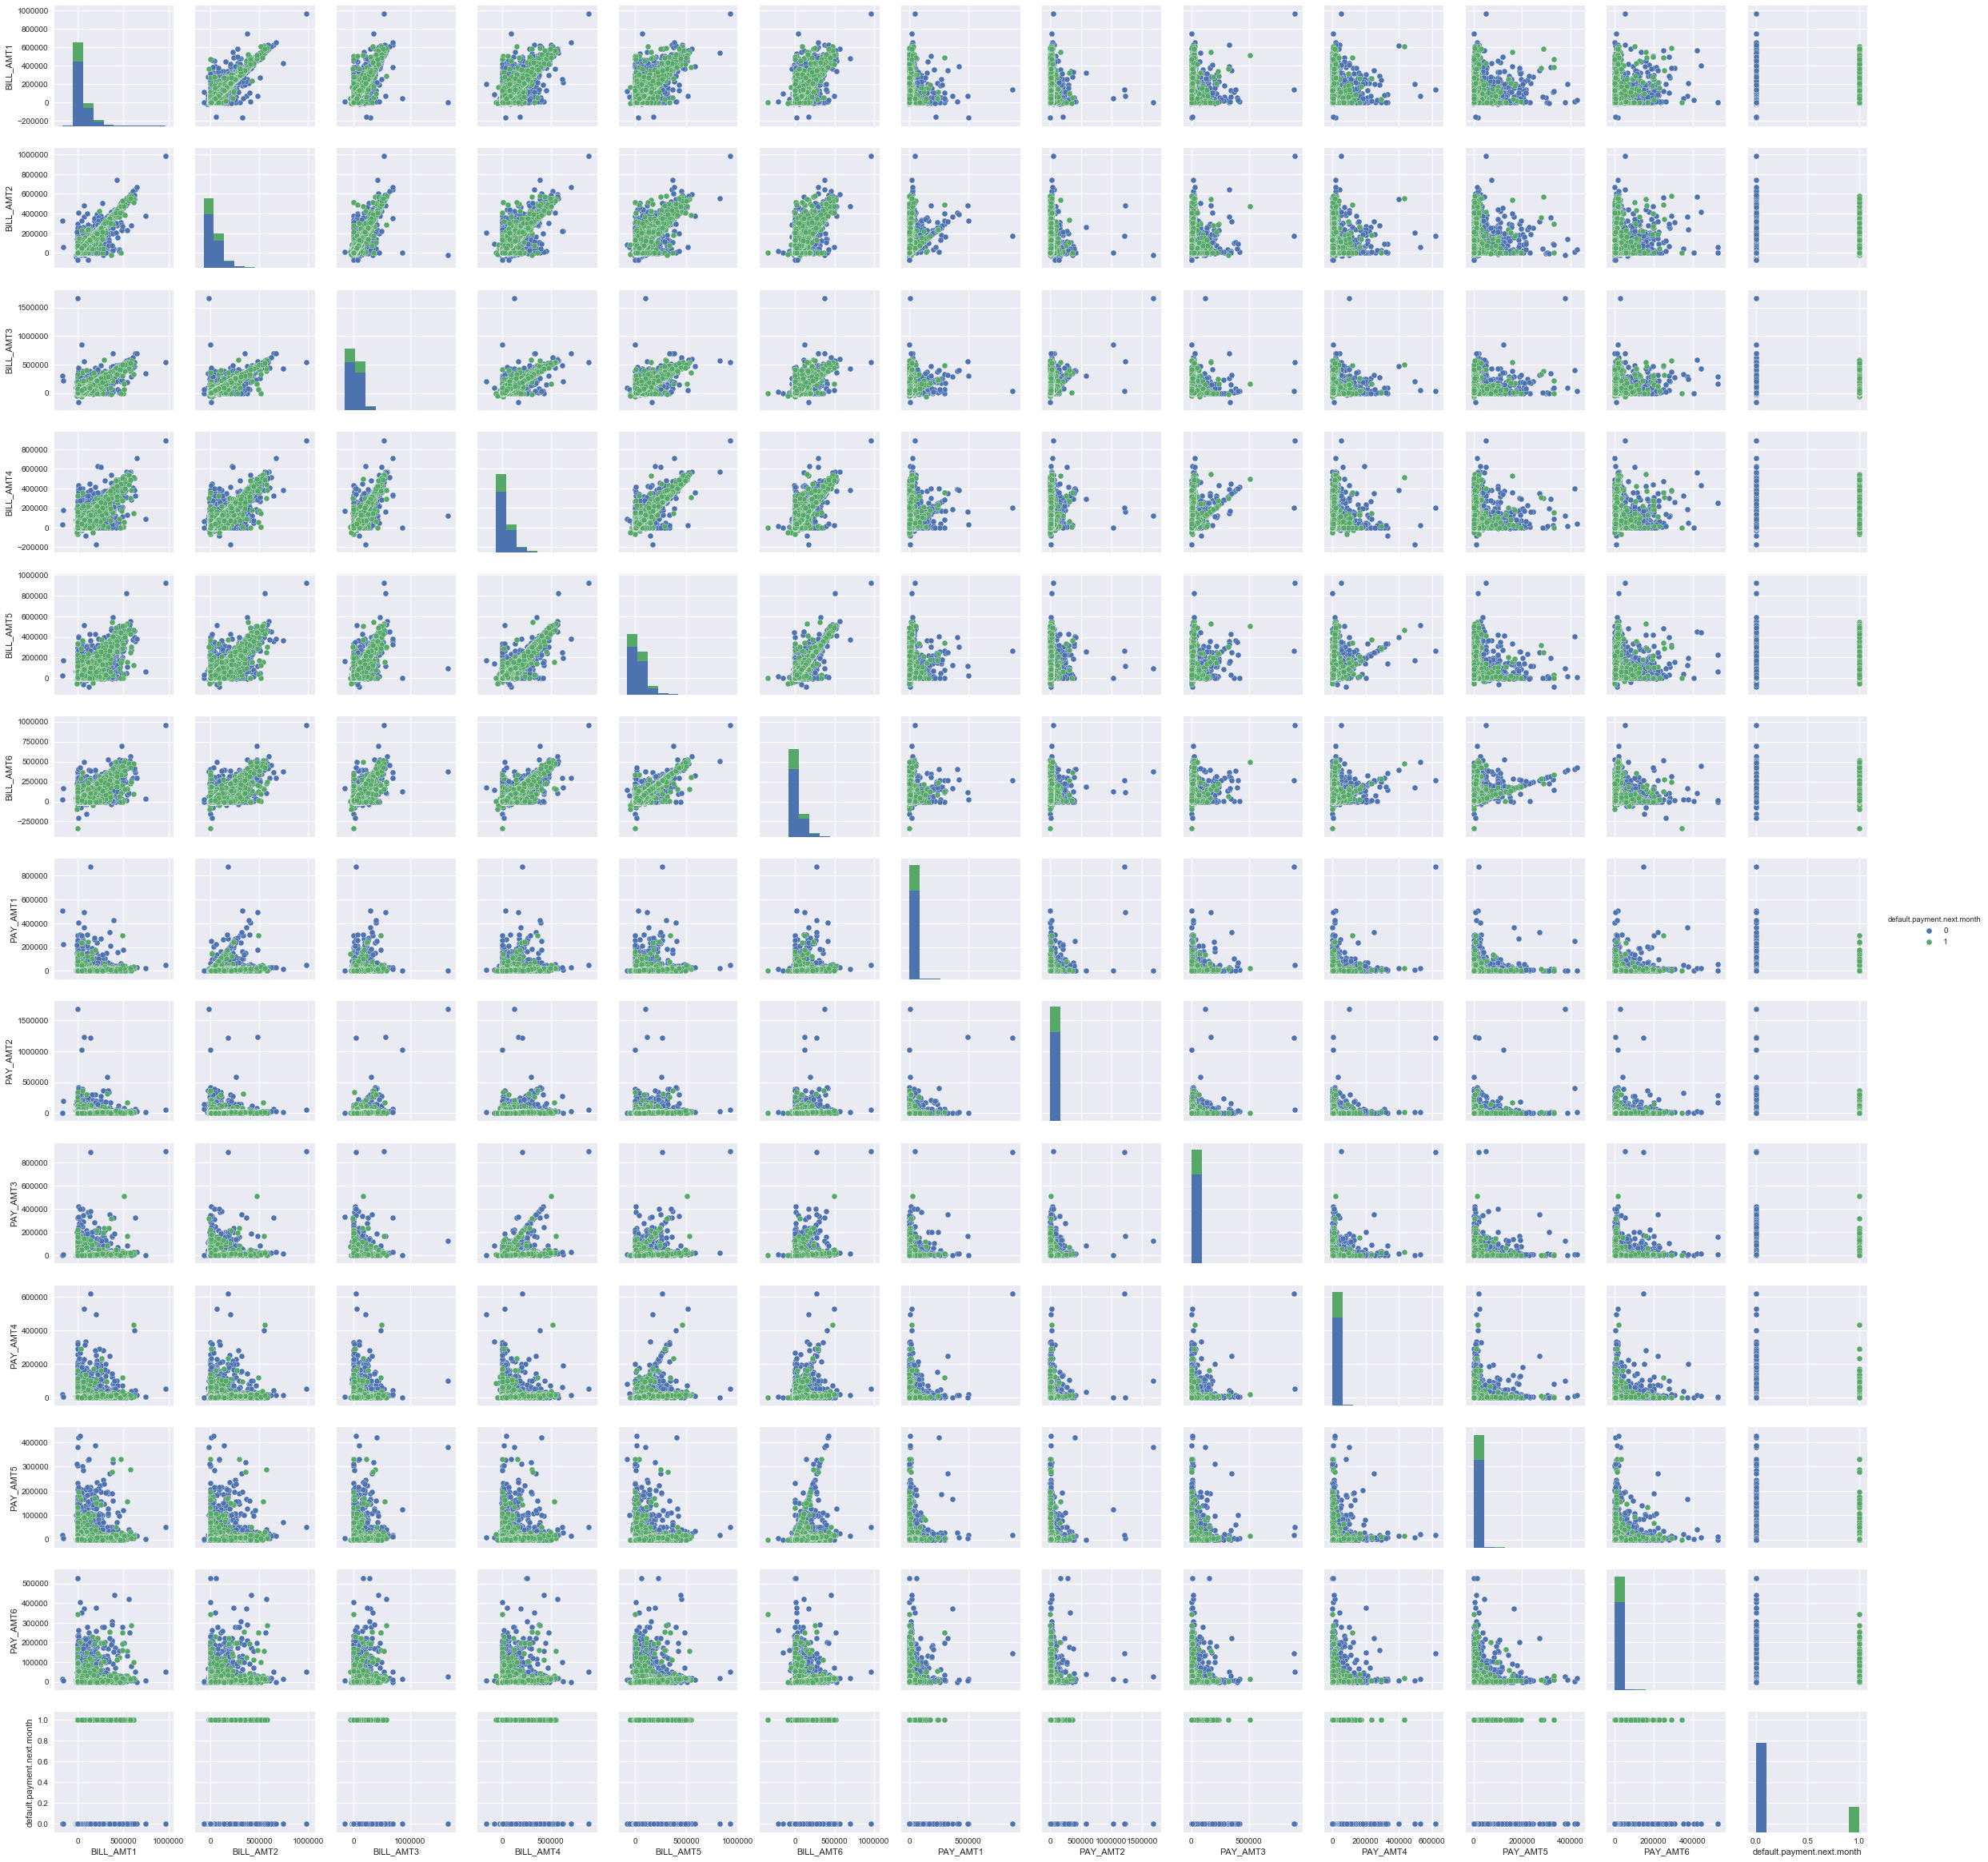

In [9]:
#рассмотрим 2ой кластер
sns.pairplot(df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','default.payment.next.month']],hue='default.payment.next.month') 

In [6]:


sns.pairplot(df,hue='default.payment.next.month') 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
